In [1]:
import numpy as np
import pandas as pd

In [2]:
## Import dataset for training

df = pd.read_csv("./loan_approval_dataset.csv")

In [9]:
df.head(20)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


## Data prepro and cleaning

In [12]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [10]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [37]:
## Check for unique values in each col
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [18]:
## Get columns from dataset
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

### Check for object type columns

In [38]:
df[' education'].value_counts()

## Graduate - Masters and above
## Non-Grad - Bachelors and below

 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64

In [30]:
df[' self_employed'].value_counts()

 Yes    2150
 No     2119
Name:  self_employed, dtype: int64

In [39]:
df[' loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name:  loan_status, dtype: int64

### Label encode object type column for training use

In [42]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label_encoder = LabelEncoder()

In [45]:
df[' education'] = label_encoder.fit_transform(df[' education'])
df[' self_employed'] = label_encoder.fit_transform(df[' self_employed'])
df[' loan_status'] = label_encoder.fit_transform(df[' loan_status'])

In [46]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


## EDA Visualisation

In [47]:
import plotly.express as px

In [51]:
edu_counts = df[' education'].value_counts()
fig = px.pie(values=edu_counts, names=['Non Graduate', 'Graduate'])
fig.show()

In [55]:
num_dep_counts = df[' no_of_dependents'].value_counts()
fig = px.bar(num_dep_counts)
fig.update_layout(xaxis_title='Number of Dependents', yaxis_title='Count')
fig.show()

In [58]:
self_employed_counts = df[' self_employed'].value_counts()
fig = px.pie(values=self_employed_counts, names=['No', 'Yes'])
fig.show()

In [69]:
fig = px.histogram(df, x=' income_annum', title='Income Distribution')
fig.show()

In [72]:
# Calculate the counts of loan status for each education level
loan_status_counts = df.groupby([' education', ' loan_status']).size().unstack(fill_value=0)

# Create a stacked bar chart using Plotly Express
fig = px.bar(loan_status_counts, 
             x=loan_status_counts.index, 
             y=['N', 'Y'],  # 'N' and 'Y' represent loan status: No and Yes
             labels={' education': 'Education', 'value': 'Count', 'variable': 'Loan Status'},
             title='Loan Status by Education Level',
             barmode='stack')

# Show the stacked bar chart
fig.show()

In [73]:
fig = px.histogram(df, x=' loan_term', title='Loan Term Distribution')
fig.show()

In [76]:
# Create a violin plot using Plotly Express
fig = px.violin(df, x=" loan_status", y=" income_annum", box=True, points="all", hover_data=df.columns)

# Set plot title and axis labels
fig.update_layout(title="Distribution of Annual Income by Loan Status",
                  xaxis_title="Loan Status",
                  yaxis_title="Annual Income")

# Show the plot
fig.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    education                 4269 non-null   int32
 3    self_employed             4269 non-null   int32
 4    income_annum              4269 non-null   int64
 5    loan_amount               4269 non-null   int64
 6    loan_term                 4269 non-null   int64
 7    cibil_score               4269 non-null   int64
 8    residential_assets_value  4269 non-null   int64
 9    commercial_assets_value   4269 non-null   int64
 10   luxury_assets_value       4269 non-null   int64
 11   bank_asset_value          4269 non-null   int64
 12   loan_status               4269 non-null   int32
dtypes: int32(3), int64(10)
memory usage: 383.7 KB


## Train test split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [82]:
X = df.drop(columns = [' loan_status'])
y = df[' loan_status']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier(n_jobs=-1)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

Accuracy:  0.977751756440281


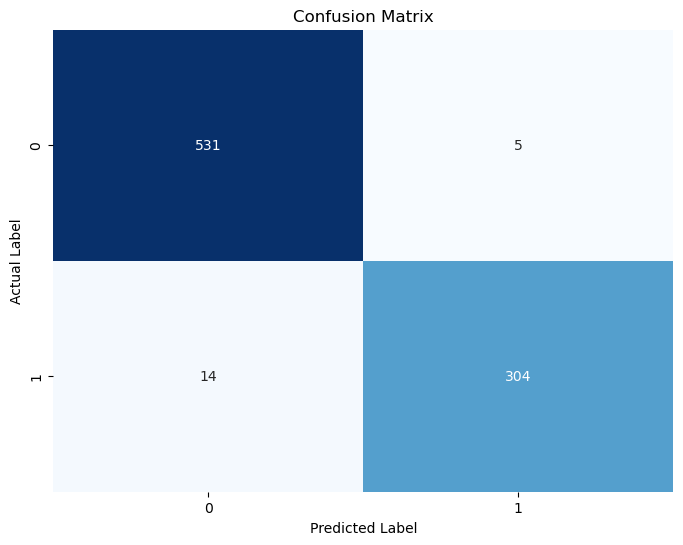

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy score
score = accuracy_score(y_test, y_pred)
print("Accuracy: ", score)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# !pip install xgboost

In [95]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb = XGBClassifier(n_jobs=-1)

# Fit the classifier to the training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

Accuracy:  0.9812646370023419


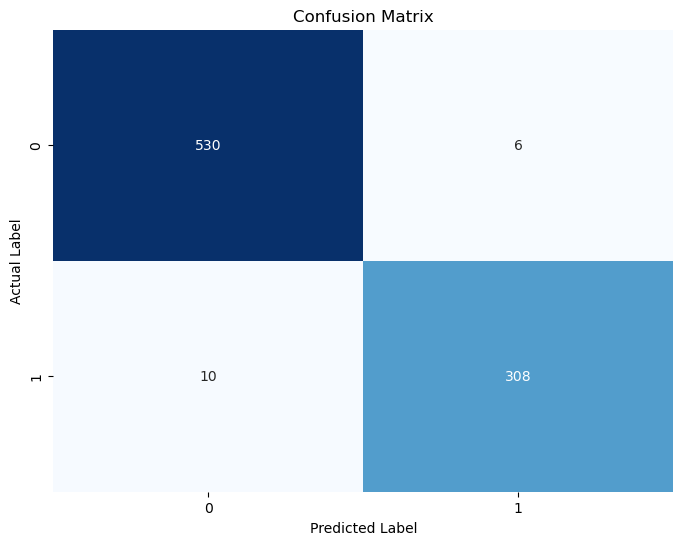

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Calculate accuracy score
score = accuracy_score(y_test, y_pred)
print("Accuracy: ", score)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Calculate accuracy score
score_logreg = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy: ", score_logreg)

Logistic Regression Accuracy:  0.6370023419203747


In [98]:
## Export XGBoost Model
from joblib import dump

# Save the trained model to a file
dump(rf, 'rf_loan_prediction_model.joblib')

['rf_loan_prediction_model.joblib']